In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets 


In [69]:
df = pd.read_csv('../dataset/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [70]:
df.shape

(506, 14)

In [71]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


B1: Problem and Data Understanding
Using given data to predict the house price
 

BOSTON HOUSING DATASET

The dataset contains information about various attributes related to housing in Boston. It includes details such as the per capita crime rate, zoning proportions, industrial proportions, proximity to the Charles River, nitric oxide concentration, average number of rooms per dwelling, age of the property, distance to employment centers, accessibility to highways, and property tax rates. This dataset enables analysis and exploration of factors influencing housing in Boston.


- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

B2: Data Preparation

In [72]:
# Check Null
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

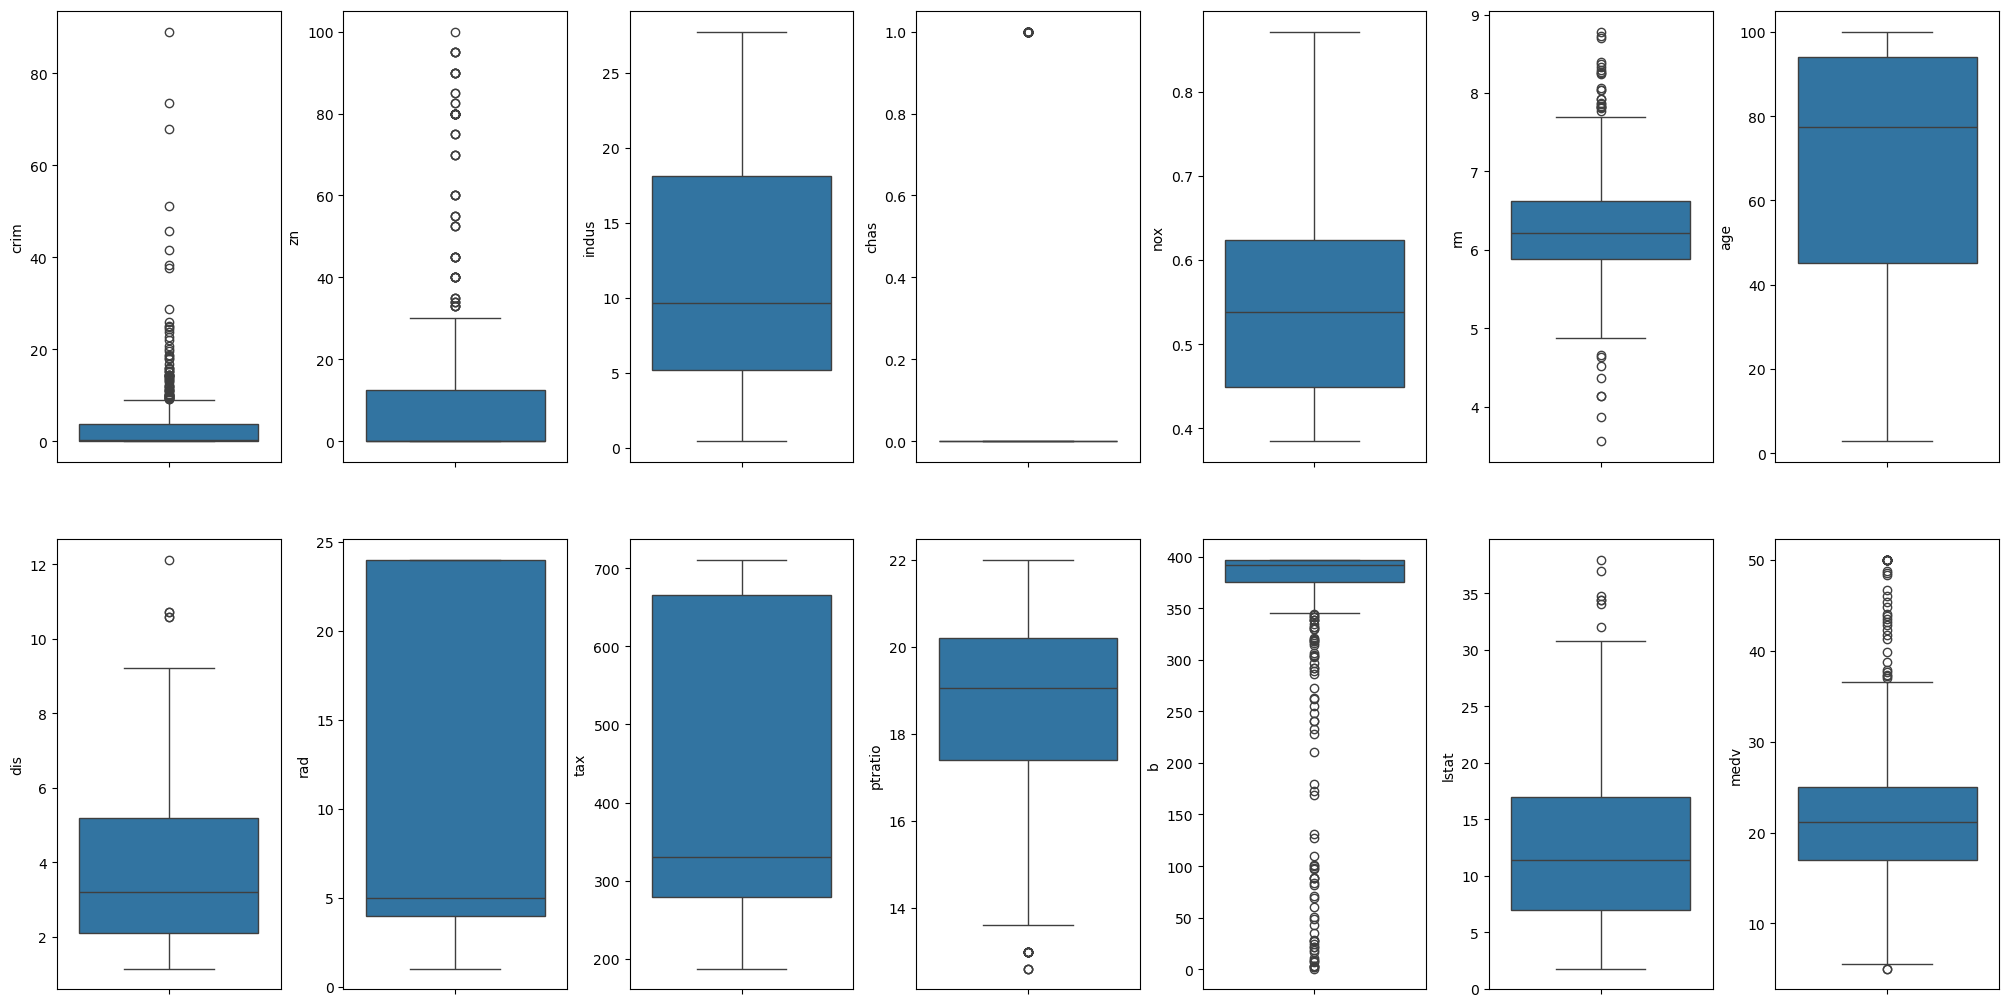

In [73]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
axs = axs.flatten()
index = 0
for k, v in df.items():
    sns.boxplot(y = k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [74]:
df = df[~(df['medv'] >= 50.0)]
print(np.shape(df))

(490, 14)


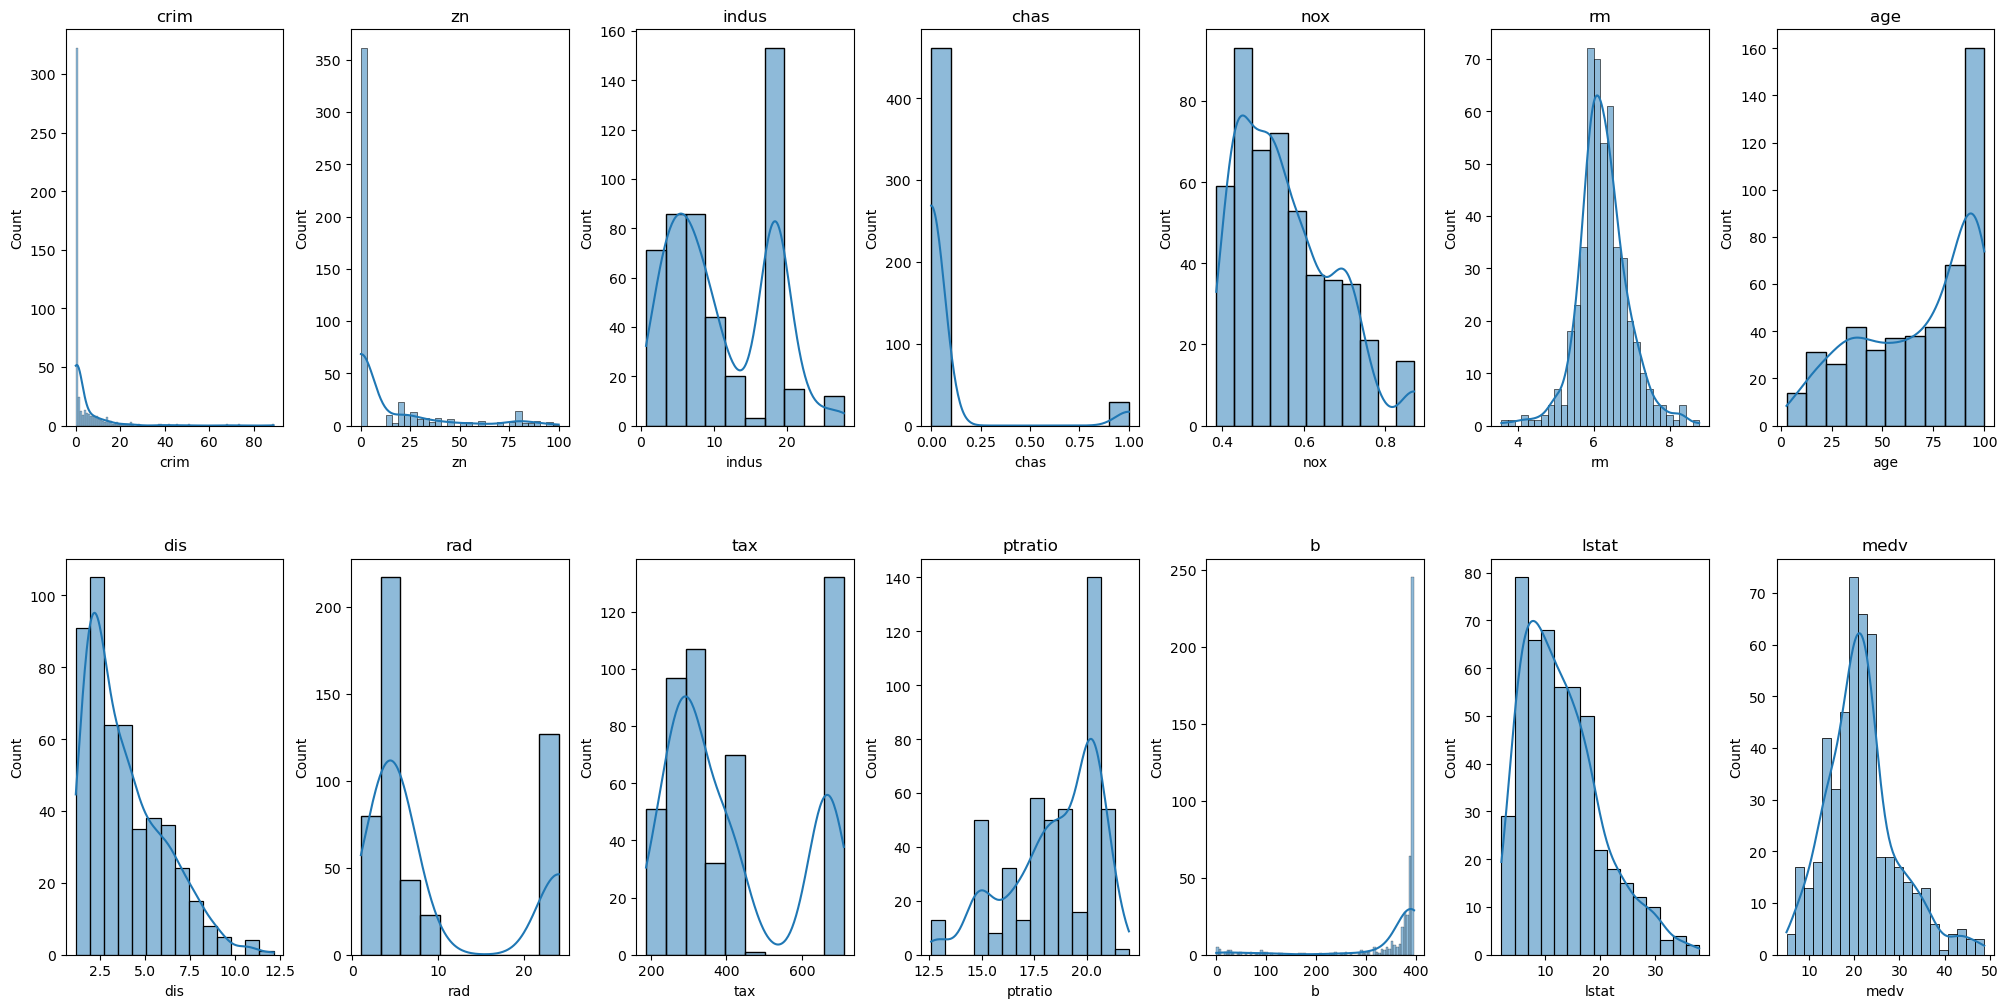

In [75]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
axs = axs.flatten()
for idx, (col, series) in enumerate(df.items()):
    sns.histplot(series, ax=axs[idx], kde=True)
    axs[idx].set_title(col)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<Axes: >

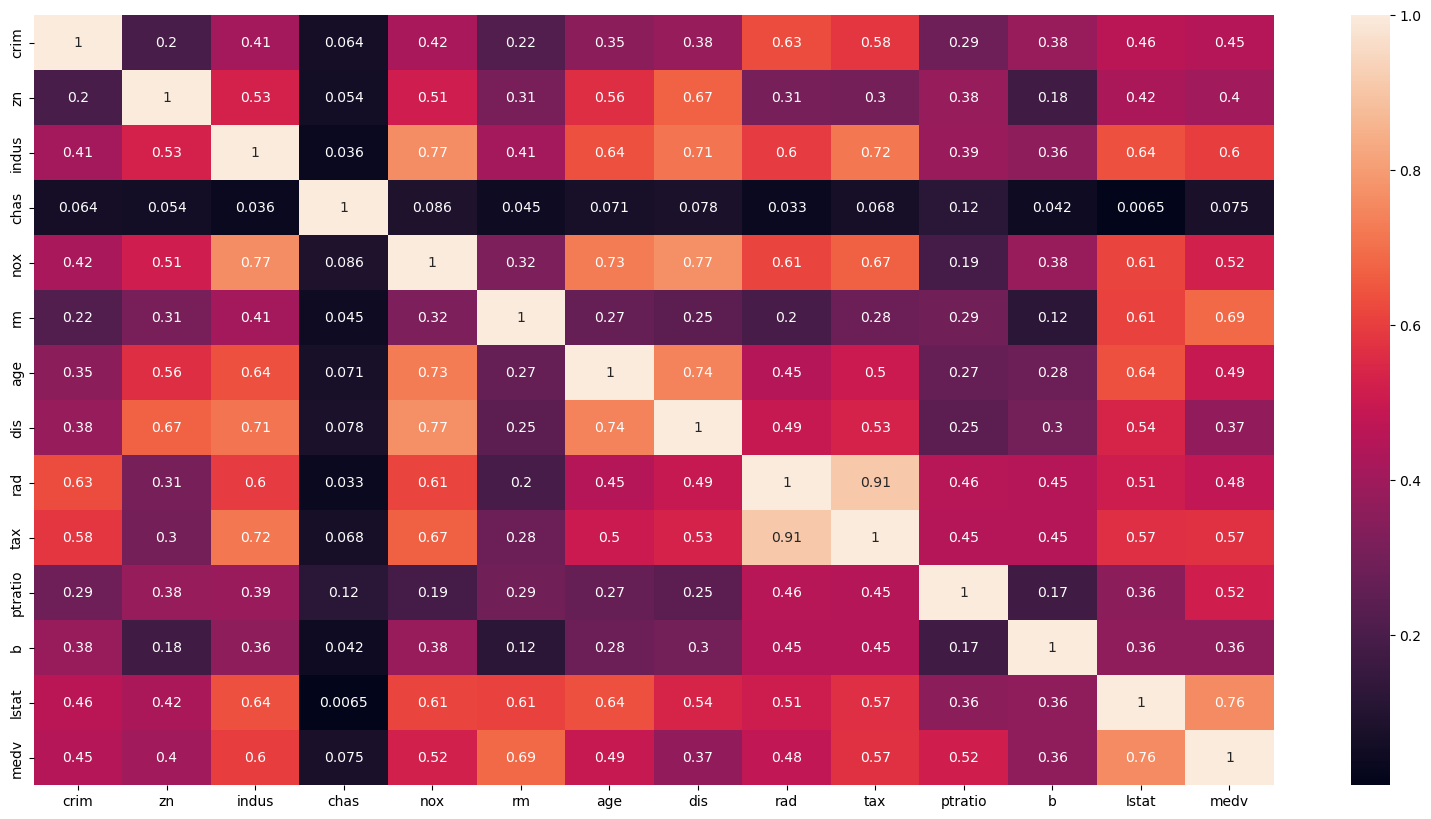

In [76]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(), annot=True)

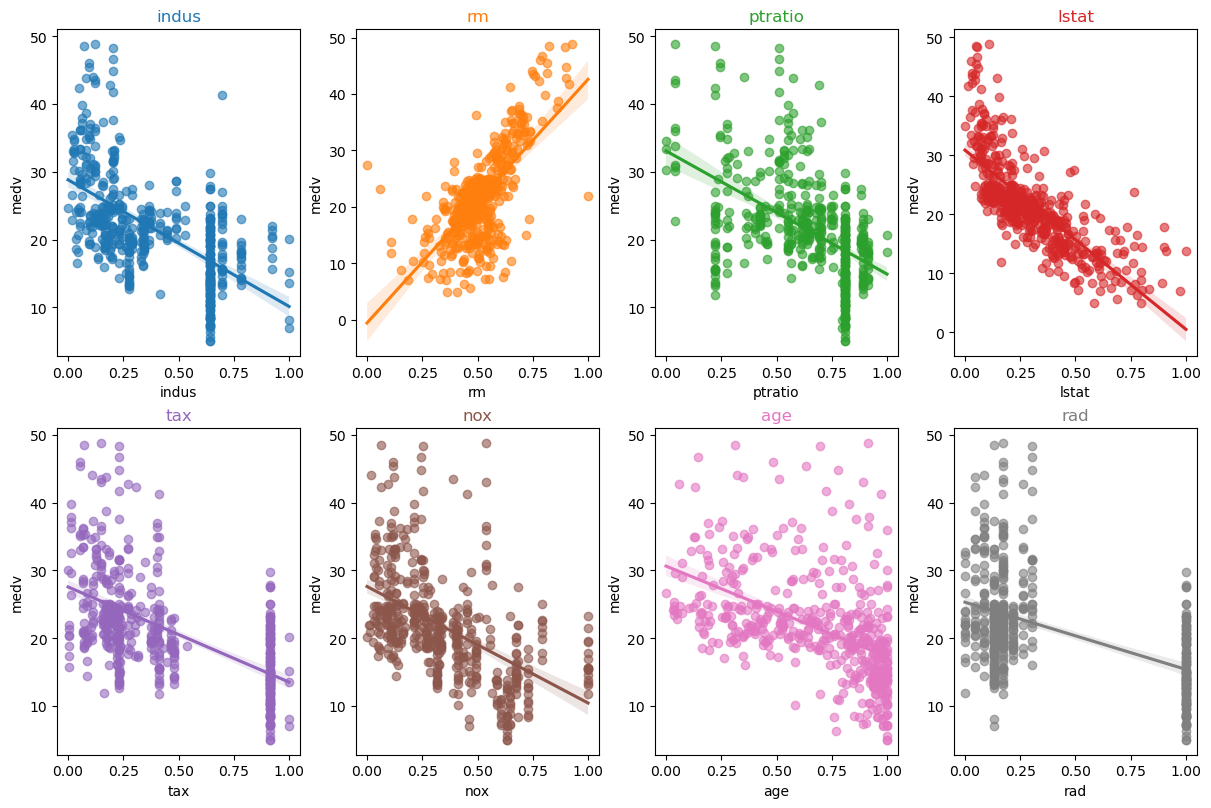

In [77]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
cols = ['indus', 'rm', 'ptratio', 'lstat', 'tax', 'nox', 'age', 'rad']

x = df.loc[:, cols]
y = df['medv']
x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=cols)

colors = sns.color_palette(n_colors=len(cols))

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
axs = axs.flatten()

for i, k in enumerate(cols):
    sns.regplot(
        x=x[k], y=y, ax=axs[i],
        scatter_kws={'color': colors[i], 'alpha':0.6},
        line_kws   ={'color': colors[i]}
    )
    axs[i].set_title(k, color=colors[i])


plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.6)

In [78]:
# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

In [79]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,  y, test_size=0.25)
y_train


248    3.238678
420    2.873565
172    3.182212
354    2.954910
302    3.310543
         ...   
23     2.740840
126    2.815409
57     3.484312
118    3.063391
89     3.391147
Name: medv, Length: 367, dtype: float64

In [81]:
# Train the Linear Regression model
linear_model.fit(x_train, y_train)

# Predict on test set
y_pred = linear_model.predict(x_test)



In [82]:
# Evaluate on test set
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae  = mean_absolute_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE:  {mae:.3f}")
print(f"Test R²:   {r2:.3f}")

cv_scores = cross_val_score(linear_model, x_train, y_train, cv=5, scoring='r2')
print("CV R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

Test RMSE: 0.194
Test MAE:  0.147
Test R²:   0.714
CV R² scores: [0.80760152 0.71490077 0.70077532 0.62136768 0.80444554]
Mean CV R²: 0.7298181661533231
